Tutorial of SGM for fMRI

In [1]:
import sys
sys.path.append("../mypkg")

In [2]:
from constants import DATA_ROOT, MIDRES_ROOT, FIG_ROOT
from sgm_fMRI.sgm_fMRI import sgm_fMRI

In [3]:
%load_ext autoreload
%autoreload 2
# 0,1, 2, 3, be careful about the space

In [4]:
import scipy
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(FIG_ROOT/'base.mplstyle')

## Load data

In [5]:
# load SC matrix, nROI x nROI
SC_mat = loadmat(DATA_ROOT/"SC_HC_BN_template_nature_order.mat")["SC_template"];
# load the fMRI data, should be ntime x nROI
data = np.loadtxt(DATA_ROOT/"fMRI_example.txt");

## `SGM_fMRI` class

In [10]:
# initial the sgm_fMRI class
# raw_sc: the SC matrix
fit = sgm_fMRI(raw_sc=SC_mat);

In [18]:
# add fMRI to do fit
# data: fMRI data with ntime x nroi
# fband (list): The frequency band of interest, [low, high]
# model_focus (str): The focus of the model (e.g., "both", "FX(psd)", "FC").
# eig_weights (bool): Whether to use eigenvalue weights.
# is_ann (bool): Whether to use annealing to fit or not.
fit.add_data(data=data, 
                      fband = [0.008, 0.08],
                      model_focus="both", 
                      fitmean=False, 
                      eig_weights=False, 
                      is_ann=True)


In [24]:
# fit SGM on the fMRI
# all the arguments are optional
# theta0 (list): initial value of theta
# maxiter (int): Max iteration for optimization
# bds: The bounds for the fitting
#fit.fit(theta0=[0.5, 1], 
#        maxiter=1000, 
#        bds=[[0.1, 10], [0.1, 5]])
fit.fit()
fit.fit_res

# add some metric between model PSD/FC and emp PSD/FC

     fun: 1.5627611420918044
 message: ['Maximum number of iteration reached']
    nfev: 4151
    nhev: 0
     nit: 1000
    njev: 50
  status: 0
 success: True
       x: array([0.17308063, 2.86802536])

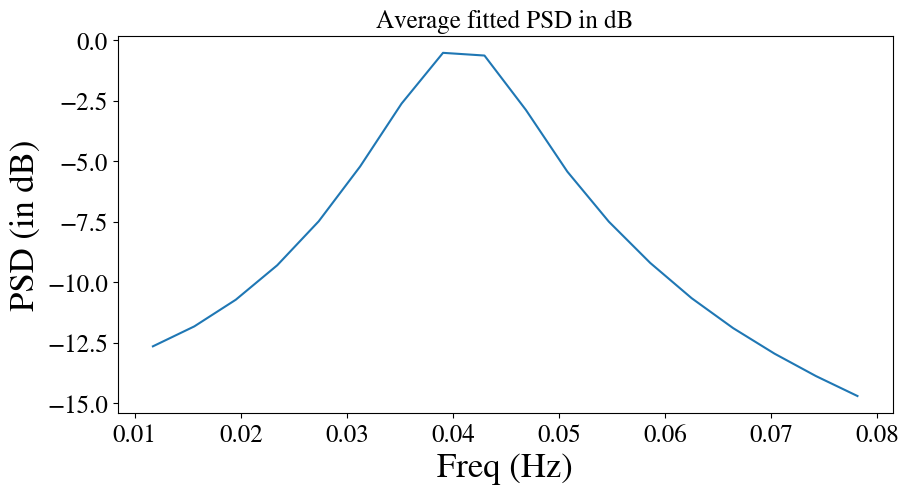

In [22]:
# Get the modelled PSD from SGM
# the output is in abs maginitude (20log10(PSD) to dB)
# theta: the SGM parameters. 
# if it is none, use the fitted value
psd = fit.forward_FX(theta=None);
#psd = fit.forward_FX(theta=[0.1, 2]);

psd_dB = 20 * np.log10(psd)
plt.title("Average fitted PSD in dB")
plt.plot(fit.fvec, psd_dB.mean(axis=1))
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (in dB)");

<AxesSubplot:title={'center':'Example FC'}>

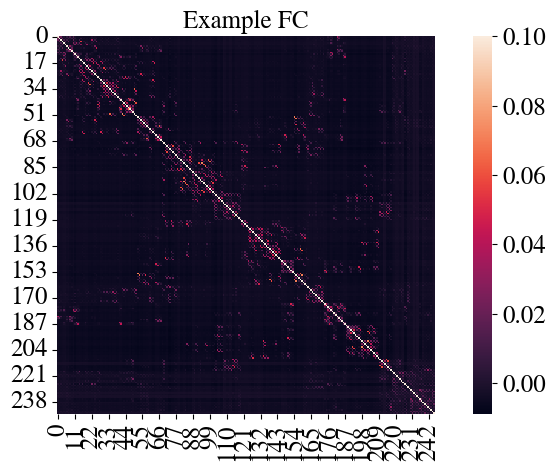

In [23]:
# Get the modelled FC from SGM
# theta: the SGM parameters. 
# if it is none, use the fitted value
fc = fit.forward_FC(theta=None);
#fc = fit.forward_FC(theta=[0.1, 2]);


plt.title("Example FC")
sns.heatmap(fc, square=True, vmax=0.1)